In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
#from  sklearn.cross_validation import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import sklearn.model_selection as ms
import seaborn as sns
import matplotlib
from sklearn.preprocessing import Binarizer
import sklearn
import math
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
from scipy.stats import norm, skew #for some statistics


In [2]:
df1=pd.read_csv(r"C:\Users\SaurabhM\Desktop\data\train_NIR5Yl1.csv")
df2=pd.read_csv(r"C:\Users\SaurabhM\Desktop\data\test_8i3B3FC.csv")

In [3]:

labelencoder_X = LabelEncoder()

df1['Tag'] = labelencoder_X.fit_transform(df1['Tag'])

"""
bn = Binarizer(threshold=7)
pd_watched = bn.transform([df1['Answers']])[0]
df1['pd_watched'] = pd_watched
"""
df1=df1.drop(df1[df1.Views > 3000000].index)


target=df1["Upvotes"]

df1 = df1.drop(["ID","Username"],axis = 1)

In [4]:

df1.head()

,Tag,Reputation,Answers,Views,Upvotes
0,0,3942.0,2.0,7855.0,42.0
1,0,26046.0,12.0,55801.0,1175.0
2,1,1358.0,4.0,8067.0,60.0
3,0,264.0,3.0,27064.0,9.0
4,1,4271.0,4.0,13986.0,83.0


In [5]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

numeric_feats = df1.dtypes[df1.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = df1[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
Upvotes,75.246625
Views,11.363395
Reputation,11.230413
Answers,3.359799
Tag,0.337232



 mu = 333.49 and sigma = 3453.68



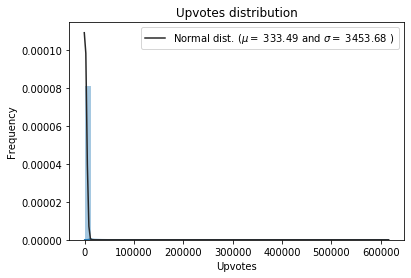

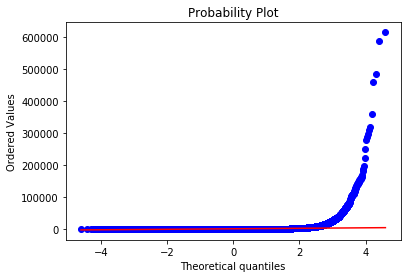

In [6]:

sns.distplot(df1['Upvotes'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df1['Upvotes'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Upvotes distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df1['Upvotes'], plot=plt)
plt.show()


 mu = 3.54 and sigma = 1.84



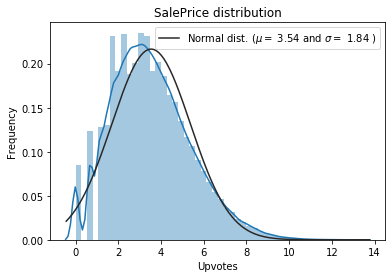

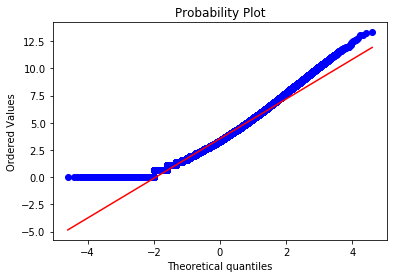

In [7]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df1["Upvotes"] = np.log1p(df1["Upvotes"])

#Check the new distribution 
sns.distplot(df1["Upvotes"] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df1["Upvotes"])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df1["Upvotes"], plot=plt)
plt.show()

In [8]:
#Skewness Feature

numeric_feats = df1.dtypes[df1.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = df1[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
Views,11.363395
Reputation,11.230413
Answers,3.359799
Upvotes,0.552286
Tag,0.337232


In [9]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    df1[feat] = boxcox1p(df1[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 5 skewed numerical features to Box Cox transform


In [10]:
df1 = df1.drop("Upvotes",axis=1)
df1.shape


(330032, 4)

In [11]:
target.shape

(330032,)

In [12]:
X_train,X_test,y_train,y_test=ms.train_test_split(df1,target,test_size=0.22,random_state=42)

In [13]:
#Standard Scaling to bring the data to mean zero 
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


In [14]:
#Polynomial Regression
poly_reg = PolynomialFeatures(degree = 4,interaction_only=False, include_bias=True)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_train, y_train)
lin_reg_1 = linear_model.LassoLars(alpha=0.009,max_iter=200)
lin_reg_1.fit(X_poly, y_train)
# predicitng 
pred_val = lin_reg_1.predict(poly_reg.fit_transform(X_test))

print(r2_score(y_test, pred_val))


mse = sklearn.metrics.mean_squared_error(y_test, pred_val)
rmse = math.sqrt(mse)
print(rmse)

0.7783995696864259
1755.0130605649056


In [15]:
#ElasticSearch
from sklearn.linear_model import ElasticNet

model = ElasticNet()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(r2_score(y_test, pred))
mse = sklearn.metrics.mean_squared_error(y_test, pred)
rmse = math.sqrt(mse)
print(rmse)

0.04938236340898272
3634.946195213912


In [16]:
#Lasso Regression
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(r2_score(y_test, pred))
mse = sklearn.metrics.mean_squared_error(y_test, pred)
rmse = math.sqrt(mse)
print(rmse)

0.053924123207638286
3626.252469204414


In [17]:
#Ridge Regression

from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(r2_score(y_test, pred))
mse = sklearn.metrics.mean_squared_error(y_test, pred)
rmse = math.sqrt(mse)
print(rmse)

0.053933086477161774
3626.2352913246987


In [18]:
#Ransac  Regression
from sklearn.linear_model import RANSACRegressor

model = RANSACRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(r2_score(y_test, pred))
mse = sklearn.metrics.mean_squared_error(y_test, pred)
rmse = math.sqrt(mse)
print(rmse)

-0.006097736423868572
3739.5137895058924
